**Heart Disease Prediction**

Several health conditions, your lifestyle, and your age and family history can increase your risk for heart disease. These are called risk factors. About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease:high blood pressure, high cholesterol, and smoking.
Other key indicator like diabetic status,drinking too much alcohol.Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare.The dataset come from the Centers for Disease control and prevention (CDC),which conducts annual telephone surveys to gather data on the health status of U.S. residents

the **object** of this project is **predict Heart Disease** from the data that can predict a patient's condition.

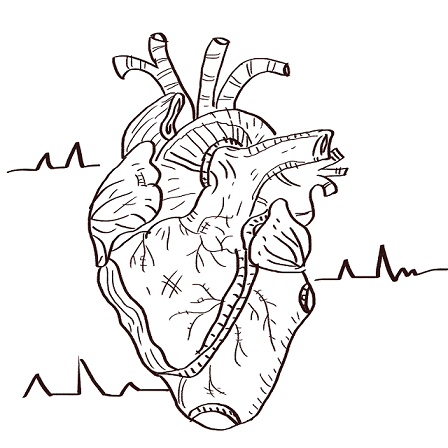

In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


## Load data

In [4]:
df=pd.read_csv('/content/heart_2020_cleaned.csv')
df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
169203,No,28.97,No,No,No,2.0,2.0,No,Female,65-69,White,No,Yes,Very good,9.0,No,No,No
59740,No,25.07,No,No,No,0.0,0.0,Yes,Male,50-54,Black,No,Yes,Excellent,9.0,No,No,No
130480,No,22.43,Yes,No,No,0.0,5.0,No,Male,40-44,White,No,Yes,Excellent,8.0,No,No,No
205896,No,26.58,Yes,No,No,0.0,0.0,No,Male,60-64,White,No,Yes,Good,6.0,No,No,No
152233,No,22.15,Yes,No,No,0.0,0.0,No,Male,60-64,White,No,No,Very good,8.0,No,No,No


## Information of Data

In [ ]:
df.info()
df.describe().T.round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.33,6.36,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.37,7.95,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.90,7.96,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.10,1.44,1.00,6.00,7.00,8.00,24.00


## **Analysis Questions**

## 1-The count of heart disease for each AgeCategory?

Text(0.5, 1.0, 'HeartDisease per AgeCategory')

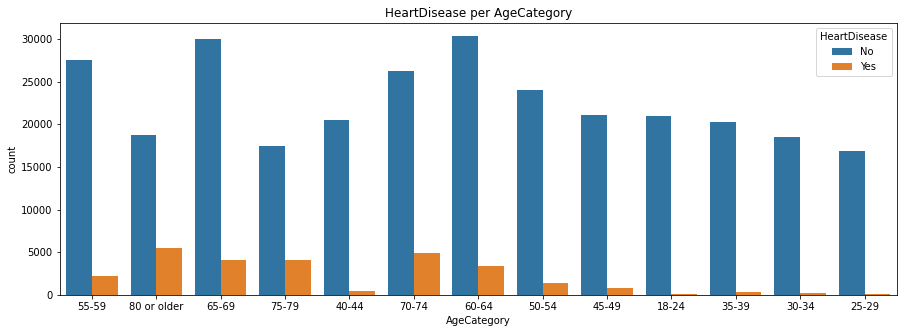

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'AgeCategory',hue = 'HeartDisease' , data = df)
plt.title('HeartDisease per AgeCategory')


Text(0.5, 1.0, 'HeartDisease per AgeCategory')

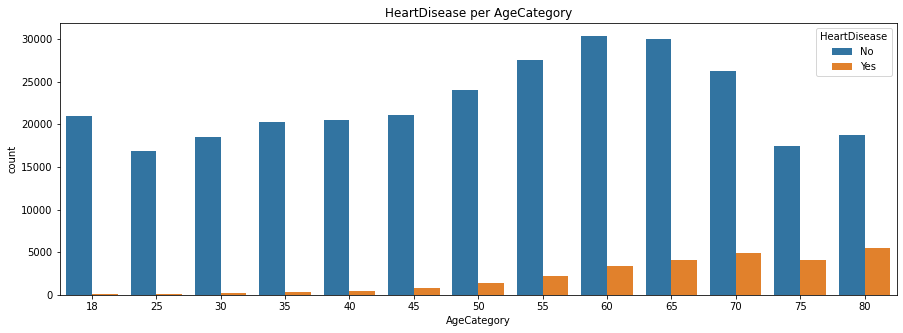

In [ ]:
a=df['AgeCategory'].map({'18-24':18,'25-29':25,'30-34':30,'35-39':35,'40-44':40,'45-49':45,'50-54':50,'55-59':55,'60-64':60,'65-69':65,'70-74':70,'75-79':75,'80 or older':80})
plt.figure(figsize=(15,5))
sns.countplot(x = a,hue = 'HeartDisease' , data = df)
plt.title('HeartDisease per AgeCategory')


##2-The count of heart disease for Smoking people for each sex?

---



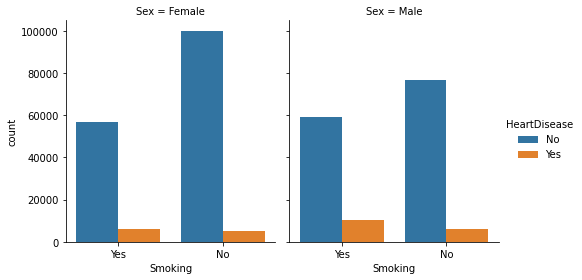

In [ ]:
sns.catplot(x="Smoking", hue="HeartDisease", col="Sex",
                data=df, kind="count",
                height=4, aspect=.9)

##3-The count of heart disease for **AlcoholDrinking** people?


Text(0.5, 1.0, 'HeartDisease for AlcoholDrinking')

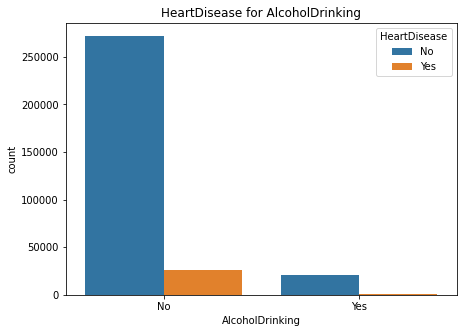

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'AlcoholDrinking',hue = 'HeartDisease' , data = df)
plt.title('HeartDisease for AlcoholDrinking')

##4-The count of heart disease depending on SleepTime?

Text(0.5, 1.0, 'HeartDisease depending on SleepTime')

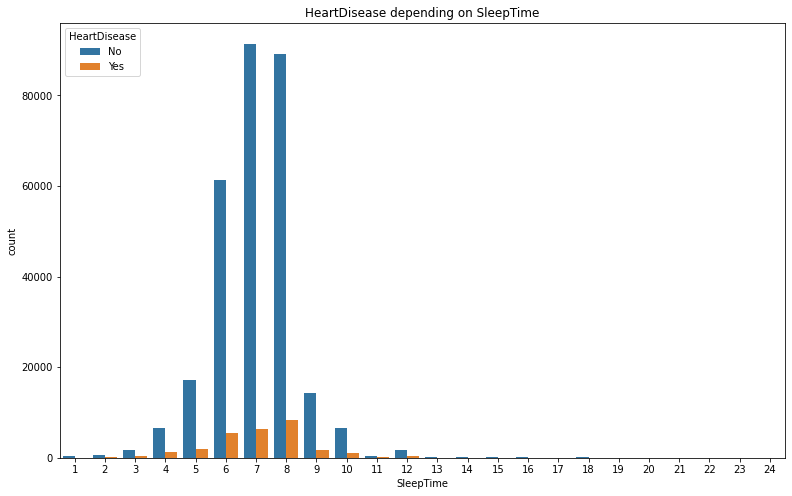

In [ ]:
plt.figure(figsize=(13,8))
sns.countplot(x = (df['SleepTime'].astype('int')),hue = 'HeartDisease' , data = df)
plt.title('HeartDisease depending on SleepTime')

##5-The count of heartdisease from each sex based on race?

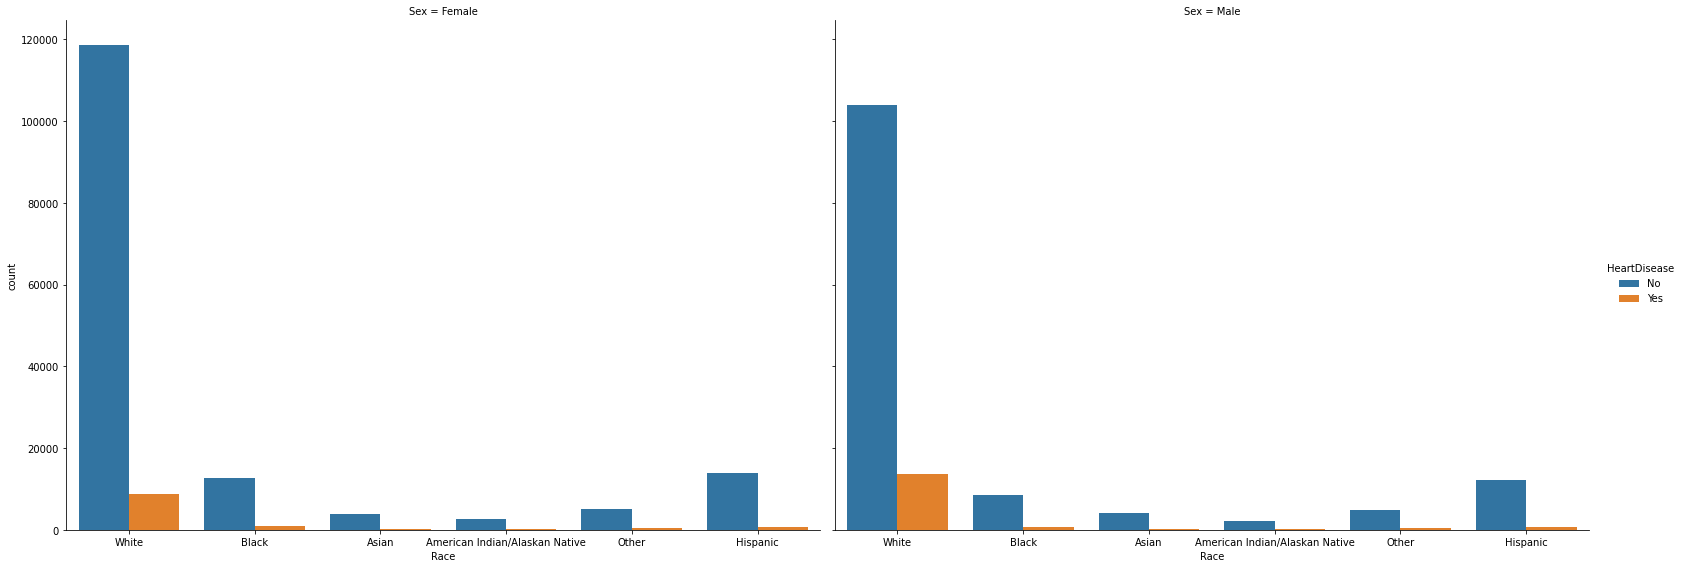

In [ ]:
sns.catplot(x="Race", hue="HeartDisease", col="Sex",
                data=df, kind="count",
                height=8, aspect=1.4)


## 6-The count of heartdisease for KidneyDisease for each sex?

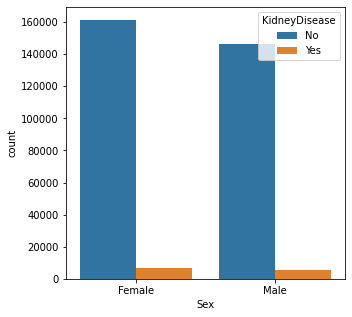

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'Sex',hue = 'KidneyDisease' , data = df)

## 7-The count of heartdisease of  smoking people that have age older than 80 and not walking and genhealth poor and have canser or stroke disease for each sex? 

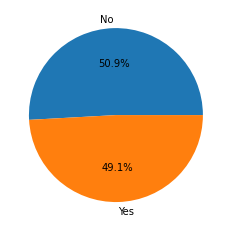

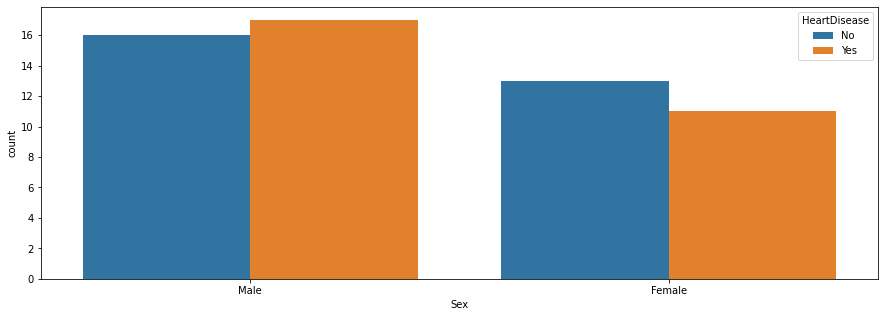

In [ ]:
mask=(df['Smoking']=='Yes') & (df['DiffWalking']=='No') & (df['GenHealth']=='Poor') & (df['AgeCategory']=='80 or older')& ((df['KidneyDisease']=='Yes')| (df['Stroke']=='Yes'))  
import matplotlib.pyplot as plt
plt.pie(df[mask]["HeartDisease"].value_counts(),labels=['No','Yes'], autopct="%1.1f%%")
plt.show() 
plt.figure(figsize=(15,5))
sns.countplot(x = 'Sex',hue = 'HeartDisease' , data = df[mask])

## 8-The count of heartdisease of  smoking people that have age older than 80 and not walking and genhealth poor and have canser or kidny disease for each sex? 

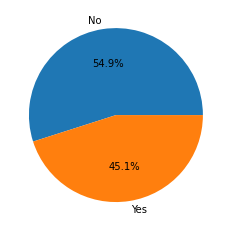

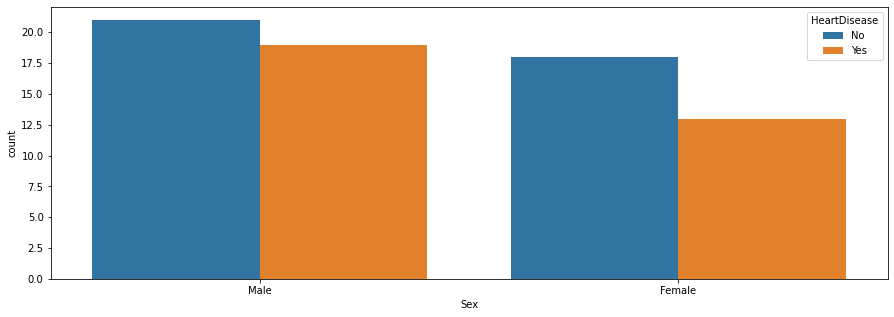

In [ ]:
mask=(df['Smoking']=='Yes') & (df['DiffWalking']=='No') & (df['GenHealth']=='Poor') & (df['AgeCategory']=='80 or older')& ((df['KidneyDisease']=='Yes')| (df['SkinCancer']=='Yes'))  
import matplotlib.pyplot as plt
plt.pie(df[mask]["HeartDisease"].value_counts(),labels=['No','Yes'], autopct="%1.1f%%")
plt.show() 
plt.figure(figsize=(15,5))
sns.countplot(x = 'Sex',hue = 'HeartDisease' , data = df[mask])

## 9-The count of heartdisease of not smoking people that have age older than 80 and walking and genhealth good and have canser or kidny disease for each sex? 

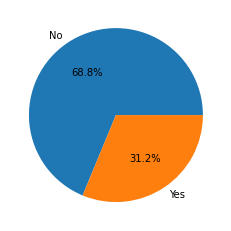

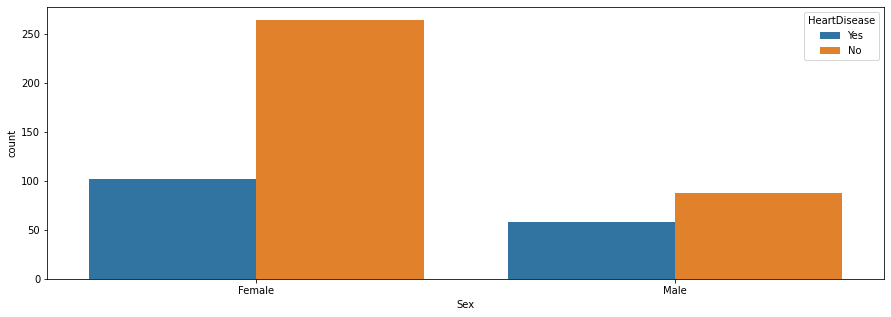

In [13]:
mask=(df['Smoking']=='No') & (df['DiffWalking']=='Yes') & (df['GenHealth']=='Good') & (df['AgeCategory']=='80 or older')& ((df['KidneyDisease']=='Yes')| (df['SkinCancer']=='Yes'))  
import matplotlib.pyplot as plt
plt.pie(df[mask]["HeartDisease"].value_counts(),labels=['No','Yes'], autopct="%1.1f%%")
plt.show() 
plt.figure(figsize=(15,5))
sns.countplot(x = 'Sex',hue = 'HeartDisease' , data = df[mask])

## 10-The count of heart diseas that have Diabetic?

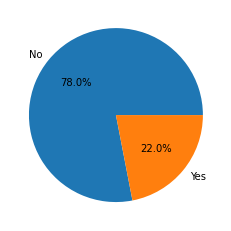

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df[df['Diabetic']=='Yes']["HeartDisease"].value_counts(),labels=['No','Yes'], autopct="%1.1f%%")
plt.show()

##11- The count of heart diseas that have **Asthma**?

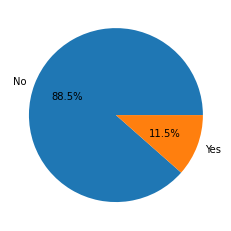

In [14]:
import matplotlib.pyplot as plt
plt.pie(df[df['Asthma']=='Yes']["HeartDisease"].value_counts(),labels=['No','Yes'], autopct="%1.1f%%")
plt.show()

## **Processing**

## Missing Values and duplicate rows

In [ ]:
print('the missing values counts in each variable is: \n\n',df.isna().sum())
print('------------------------------------------------------------------')
print('check for any value not nan in categorical fetures \n')
categ_col = df.select_dtypes(include = ["object"])
for col in categ_col:
    print('---------------------------------')
    print(col)
    print('---------------------------------')
    print(df[col].value_counts())
    print('---------------------------------')
print('\n')
# Dropping the duplicate rows
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows : ",duplicate_rows.shape)
df.drop_duplicates(inplace=True)
print("number of rows after delet dublicated : ",df.shape)

the missing values counts in each variable is: 

 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64
------------------------------------------------------------------
check for any value not nan in categorical fetures 

---------------------------------
HeartDisease
---------------------------------
No     292422
Yes     27373
Name: HeartDisease, dtype: int64
---------------------------------
---------------------------------
Smoking
---------------------------------
No     187887
Yes    131908
Name: Smoking, dtype: int64
---------------------------------
---------------------------------
AlcoholDrinking
-----------------------------

##Numerical data distribution

All types :  [dtype('float64'), dtype('O')]
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   BMI             301717 non-null  float64
 1   PhysicalHealth  301717 non-null  float64
 2   MentalHealth    301717 non-null  float64
 3   SleepTime       301717 non-null  float64
dtypes: float64(4)
memory usage: 11.5 MB
None
-----------------------------------------------------------------------
          BMI  PhysicalHealth  MentalHealth  SleepTime
265849  28.37             0.0           2.0        7.0
21529   28.29             0.0           0.0        7.0
259654  21.41             0.0           0.0        7.0
217422  24.62             0.0           0.0        7.0
96250   30.79             0.0           5.0        7.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

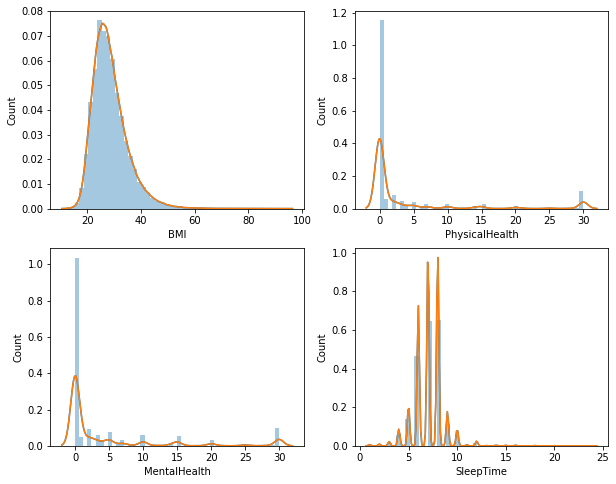

In [ ]:

# First, list all the types of our data and take only the numerical ones
print("All types : ",list(set(df.dtypes.tolist())))

print("-----------------------------------------------------------------------")
df_num = df.select_dtypes(include = ["float64"]) # "float64", "int64", "O"
print(df_num.info())

print("-----------------------------------------------------------------------")
print(df_num.sample(5))
i=1
plt.figure(figsize = (10,8))
for feature in df_num:
    plt.subplot(2,2,i)
    sns.distplot(df[feature])
    sns.kdeplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    i+=1
#df_num.hist(figsize=(10, 8), bins=100, xlabelsize=8, ylabelsize=8)

## handling outlier

In [ ]:
! pip install datasist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

--------------------------------------------


 the number of outliers: 79186
--------------------------------------------


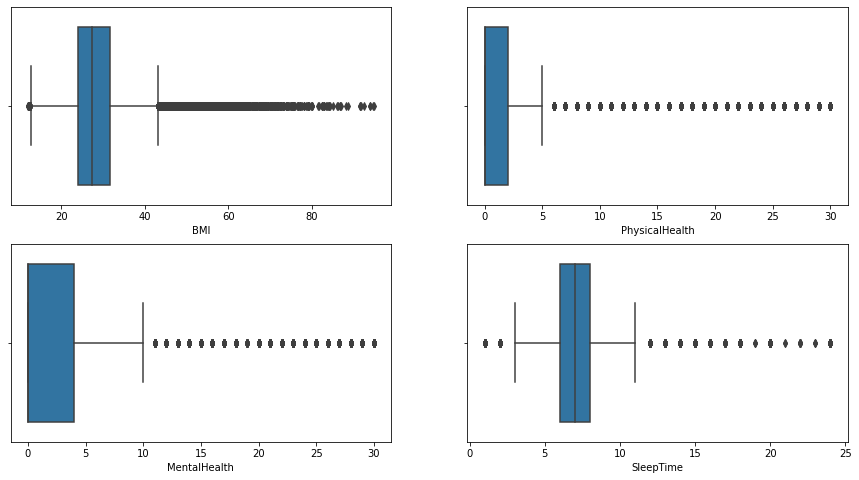

In [ ]:
df_num = df.select_dtypes(include = ["float64"])
i=1
plt.figure(figsize = (15,8))
for feature in df_num:
    plt.subplot(2,2,i)
    sns.boxplot(df_num[feature])
    i+=1

print('--------------------------------------------')
from datasist.structdata import detect_outliers
index = detect_outliers(df,0,df_num)
print('\n')
print(' the number of outliers:',len(index))
print('--------------------------------------------')

shape (before):  (301717, 18)
Q1 =  24.03  Q3 =  31.65  IQR =  7.619999999999997
Q1 =  0.0  Q3 =  2.0  IQR =  2.0
Q1 =  0.0  Q3 =  4.0  IQR =  4.0
Q1 =  6.0  Q3 =  8.0  IQR =  2.0
shape (after):  (301717, 18)




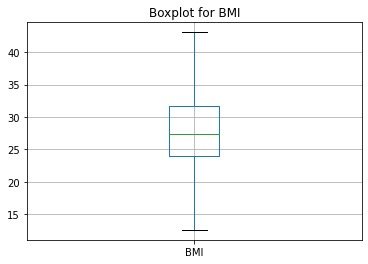

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range


print("shape (before): ",df.shape)
for i in df_num:
    lower_range, upper_range =  remove_outlier(df[i])
    df[i] = np.where(df[i] < lower_range, lower_range, df[i]) 
    df[i] = np.where(df[i] > upper_range, upper_range, df[i]) 

print("shape (after): ",df.shape)
print("\n")
df.boxplot(column=["BMI"])
plt.title('Boxplot for BMI')
plt.show()


##catigorical

In [ ]:
df['GenHealth']=df['GenHealth'].map({'Excellent':5,'Very good':4,'Good':3,'Fair':2,'Poor':1})
df['HeartDisease']=df['HeartDisease'].map({'Yes':1,'No':0})
df['AgeCategory']=df['AgeCategory'].map({'18-24':18,'25-29':25,'30-34':30,'35-39':35,'40-44':40,'45-49':45,'50-54':50,'55-59':55,'60-64':60,'65-69':65,'70-74':70,'75-79':75,'80 or older':80})
df = pd.get_dummies(data=df,drop_first=True)


## split data into input and output

In [ ]:
x=df.drop('HeartDisease',axis = 1)
y=df['HeartDisease']


In [ ]:
x.head(5)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,10.0,55,4,5.0,1,0,0,0,...,0,0,1,0,1,0,1,1,0,1
1,20.34,0.0,0.0,80,4,7.0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,5.0,10.0,65,2,8.0,1,0,0,0,...,0,0,1,0,1,0,1,1,0,0
3,24.21,0.0,0.0,75,3,6.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,23.71,5.0,0.0,40,4,8.0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
y.head(3)

0    0
1    0
2    0
Name: HeartDisease, dtype: int64

##split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0,stratify=y)


##impalanced data

0    274456
1     27261
Name: HeartDisease, dtype: int64

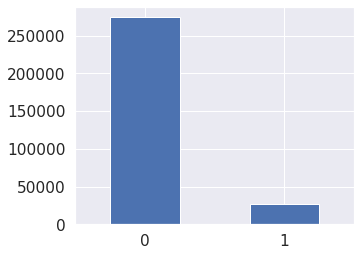

In [ ]:
sns.set(font_scale=1.4)
df["HeartDisease"].value_counts().plot(kind="bar", figsize=(5, 4), rot=0)
df["HeartDisease"].value_counts()

([<matplotlib.patches.Wedge at 0x7f5c6dedd490>,
 [Text(-1.0559821726450649, 0.3080611157803087, ''),
  Text(1.055982158223682, -0.30806116521440213, '')],
 [Text(-0.5759902759882171, 0.16803333588016836, '91.0%'),
  Text(0.5759902681220083, -0.16803336284421933, '9.0%')])

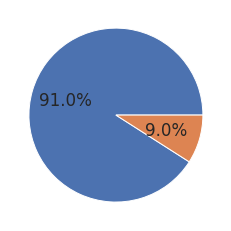

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df["HeartDisease"].value_counts(), autopct="%1.1f%%")

In [ ]:
! pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_smote , y_train_smote = smote.fit_resample(x_train,y_train)

In [ ]:
from pandas.core.base import value_counts
print('x shape=',x_train_smote.shape)
print('y shape=',y_train_smote.shape)
print('----------------------------------')
print('values count for y:\n',y_train_smote.value_counts() )

x shape= (439128, 23)
y shape= (439128,)
----------------------------------
values count for y:
 0    219564
1    219564
Name: HeartDisease, dtype: int64


##feature scaling

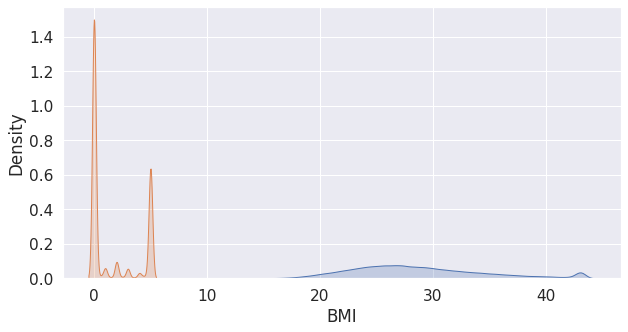

In [ ]:
plt.figure(figsize=[10,5])
sns.kdeplot(x_train_smote['BMI'],shade=True)
sns.kdeplot(x_train_smote['PhysicalHealth'],shade =  True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test)

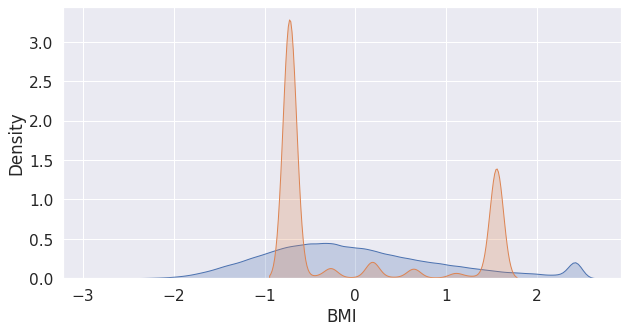

In [ ]:
x_train_scaled =pd.DataFrame(x_train_scaled,columns = scaler.get_feature_names_out())
plt.figure(figsize=[10,5])
sns.kdeplot(x_train_scaled['BMI'], shade=True)
sns.kdeplot(x_train_scaled['PhysicalHealth'],shade =  True)